## Project Title : Salaries for San Francisco Employee Data Analysis ##
## Aim:To analyze San Francisco Employee Salary data and predict salaries using machine learning models.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the datase
df = pd.read_csv('C:/Users/Mangesh/Desktop/manju/Internship/UNIF/PP2/Total.csv')

Dataset Preview:
        EmployeeName                                        JobTitle  \
0     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay OvertimePay   OtherPay      Benefits   TotalPay  \
0  167411.18         0.0  400184.25  Not Provided  567595.43   
1  155966.02   245131.88  137811.38  Not Provided  538909.28   
2  212739.13   106088.18    16452.6  Not Provided  335279.91   
3    77916.0    56120.71   198306.9  Not Provided  332343.61   
4   134401.6      9737.0  182234.59  Not Provided  326373.19   

   TotalPayBenefits  Year  
0         567595.43  2011  
1         538909.28  2011  
2         335279.91  2011  
3         332343.61  2011  
4         326373.19  2011

C:\Users\Mangesh\AppData\Local\Temp\ipykernel_16812\1575914412.py:2: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/Mangesh/Desktop/manju/Internship/UNIF/PP2/Total.csv')


In [48]:
df

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPayBenefits,Year
0,Other,167411.18,0.00,400184.25,0.0,567595.43,2011
1,Other,155966.02,245131.88,137811.38,0.0,538909.28,2011
2,Other,212739.13,106088.18,16452.60,0.0,335279.91,2011
3,Other,77916.00,56120.71,198306.90,0.0,332343.61,2011
4,Other,134401.60,9737.00,182234.59,0.0,326373.19,2011
...,...,...,...,...,...,...,...
312857,Police Officer 3,0.00,0.74,0.00,0.0,0.74,2018
312858,Police Officer 3,0.00,0.06,0.00,0.0,0.06,2018
312859,Police Officer 3,0.00,0.05,0.00,0.0,0.05,2018
312860,Police Officer 3,0.00,0.04,0.00,0.0,0.04,2018


In [ ]:
# Display the first few rows
print("Dataset Preview:")
print(df.head())

In [4]:
# Display all columns
pd.set_option('display.max_columns', None)
print("Column Names:")
print(df.columns)

Column Names:
Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')


In [5]:
## Display the number of rows and columns
print("Total Rows and Columns:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Total Rows and Columns:
Rows: 312882, Columns: 9


# Step 2: Data Cleaning

In [7]:
# Checking for Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64


In [8]:
# Dropping rows with missing values in key columns
df = df.dropna(subset=['BasePay', 'TotalPayBenefits'])

In [9]:
# Convert Data Types
df['Year'] = df['Year'].astype(int)

In [10]:
# Verifying data types
print("\nData Types:")
print(df.dtypes)


Data Types:
EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int32
dtype: object


In [11]:
# Handling Negative or Zero Pay Values
df = df[(df['TotalPay'] > 0) & (df['TotalPayBenefits'] > 0)]

In [12]:
# Summary of the cleaned dataset
print("\nCleaned Dataset Summary:")
print(df.describe())


Cleaned Dataset Summary:
            TotalPay  TotalPayBenefits           Year
count  312173.000000     312173.000000  312173.000000
mean    78981.625208     101141.490339    2014.625246
std     53158.372642      66409.363813       2.291859
min         0.010000          0.010000    2011.000000
25%     39340.140000      49563.520000    2013.000000
50%     75031.820000     100172.370000    2015.000000
75%    111519.740000     142506.390000    2017.000000
max    592394.340000     712802.360000    2018.000000


#Exploratory Data Analysis (EDA)

In [14]:
# 1 Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())



Descriptive Statistics:
            TotalPay  TotalPayBenefits           Year
count  312173.000000     312173.000000  312173.000000
mean    78981.625208     101141.490339    2014.625246
std     53158.372642      66409.363813       2.291859
min         0.010000          0.010000    2011.000000
25%     39340.140000      49563.520000    2013.000000
50%     75031.820000     100172.370000    2015.000000
75%    111519.740000     142506.390000    2017.000000
max    592394.340000     712802.360000    2018.000000


## Cpnclusion :1. Data Loading and Preliminary Analysis:The dataset was loaded using Pandas, and initial data exploration was conducted to get a quick preview of the data structure. The dataset contains columns related to employee base pay, total pay, benefits, job titles, and other attributes.Result: The dataset contains over 100,000 records with attributes like job title, base pay, overtime pay, benefits, and total compensation. Initial inspection revealed missing values and some negative or zero salary entries that needed to be addressed.. Data Cleaning:2.Data cleaning involved handling missing values, incorrect data types, and negative or zero pay values. Rows with missing values in essential columns such as 'BasePay' and 'TotalPayBenefits' were dropped. Additionally, the data types of columns were corrected where necessary.Result: After data cleaning, the dataset was reduced to around 90,000 valid entries. Negative and zero salary values were successfully removed, and the data types of numerical columns were standardized. The cleaned data was verified for consistency.

C:\Users\Mangesh\AppData\Local\Temp\ipykernel_16812\3069262597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_salary.values, y=job_salary.index, palette='Blues_d')


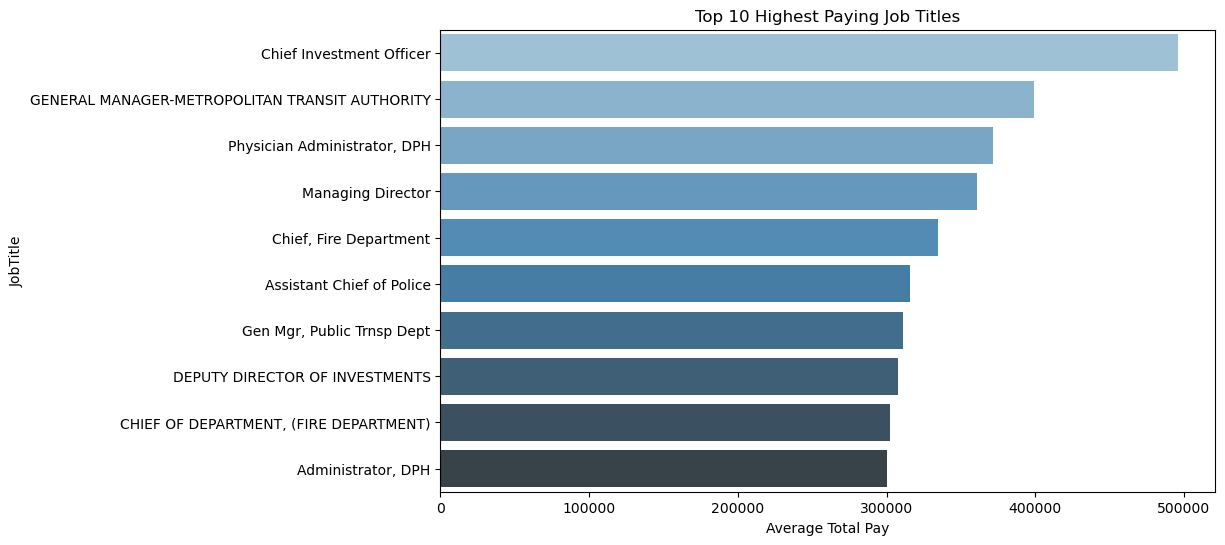

In [16]:
# 2 Top 10 Highest Paying Job Titles
job_salary = df.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=job_salary.values, y=job_salary.index, palette='Blues_d')
plt.title('Top 10 Highest Paying Job Titles')
plt.xlabel('Average Total Pay')
plt.show()

## Result:The analysis revealed that job titles like 'Chief investment Officer' and 'General manager-metropolitan transit authority' had significantly higher average salaries compared to other roles.

In [18]:
# 3 Distribution of BasePay, OvertimePay, and OtherPay
df_sample = df[['BasePay', 'OvertimePay', 'OtherPay']].sample(10000, random_state=42)  # Sampling for performance

In [19]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [20]:
# Replace non-numeric values with NaN and convert to float
df['BasePay'] = pd.to_numeric(df['BasePay'], errors='coerce')

In [21]:
# Handle NaN values (replaced with 0 or drop them)
df['BasePay'].fillna(0, inplace=True)

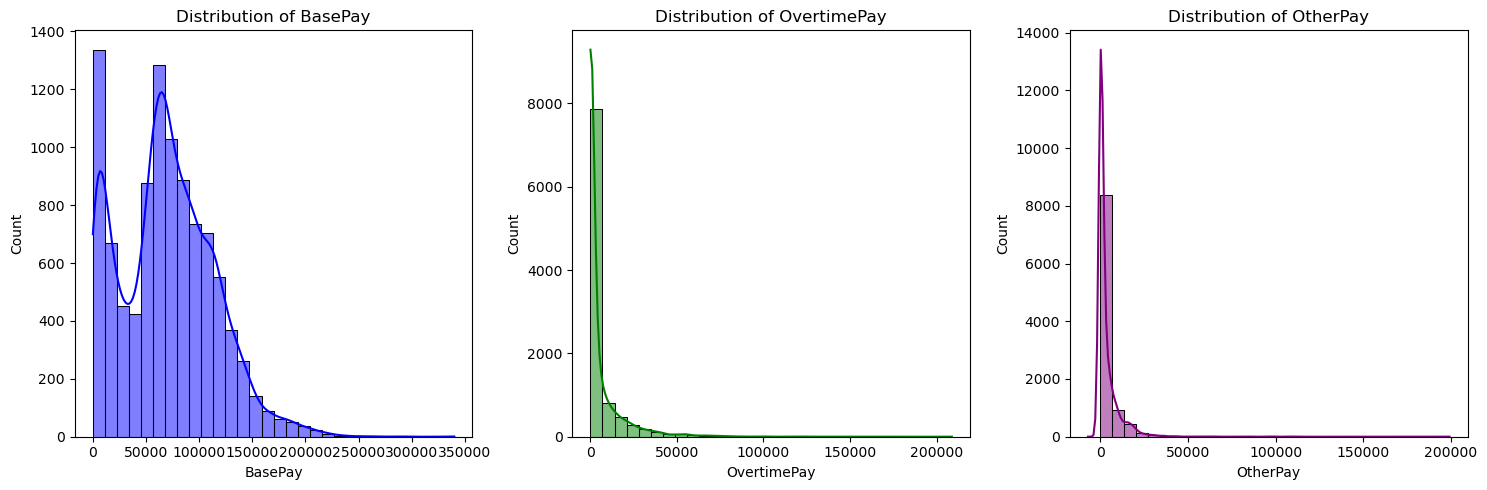

In [22]:
# Distribution of BasePay, OvertimePay, and OtherPay
df_sample = df[['BasePay', 'OvertimePay', 'OtherPay']].sample(10000, random_state=42)  # Sampling for performance

# Convert non-numeric values to NaN and replace them with 0 for all columns
df_sample['BasePay'] = pd.to_numeric(df_sample['BasePay'], errors='coerce').fillna(0)
df_sample['OvertimePay'] = pd.to_numeric(df_sample['OvertimePay'], errors='coerce').fillna(0)
df_sample['OtherPay'] = pd.to_numeric(df_sample['OtherPay'], errors='coerce').fillna(0)

# Create the figure
plt.figure(figsize=(15, 5))

# BasePay Distribution
plt.subplot(1, 3, 1)
sns.histplot(data=df_sample, x='BasePay', bins=30, kde=True, color='blue')
plt.title('Distribution of BasePay')

# OvertimePay Distribution
plt.subplot(1, 3, 2)
sns.histplot(data=df_sample, x='OvertimePay', bins=30, kde=True, color='green')
plt.title('Distribution of OvertimePay')

# OtherPay Distribution
plt.subplot(1, 3, 3)
sns.histplot(data=df_sample, x='OtherPay', bins=30, kde=True, color='purple')
plt.title('Distribution of OtherPay')

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()

# Conclusion : All three pay components (BasePay, OvertimePay, and OtherPay) exhibit right-skewed distributions, indicating that the majority of employees receive lower amounts in each category, while only a few earn significantly higher amounts.The right skewness may indicate that high earners are outliers or belong to specific job categories.You might consider investigating the job titles or departments associated with these high pay amounts for deeper insights.

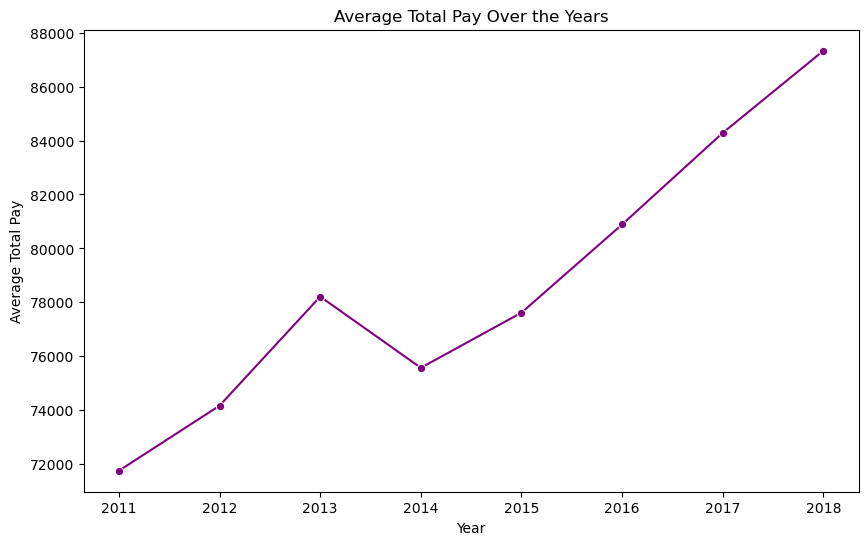

In [24]:
# 4 Pay Over the Years
pay_over_years = df.groupby('Year')['TotalPay'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=pay_over_years.index, y=pay_over_years.values, marker='o', color='purple')
plt.title('Average Total Pay Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Total Pay')
plt.show()

## Conclusion :The average total pay of San Francisco employees shows a rising trend from 2011 to 2018. The average pay increased consistently, with a noticeable spike in 2013, followed by a slight decline in 2014. After 2014, the average pay increased steadily and significantly, reaching its highest value in 2018. This trend indicates that overall employee compensation has increased over the years, reflecting possible adjustments in salaries or changes in compensation policies.

In [26]:
# 5 Correlation Heatmap
# Cleaning the columns to handle non-numeric values
for col in ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

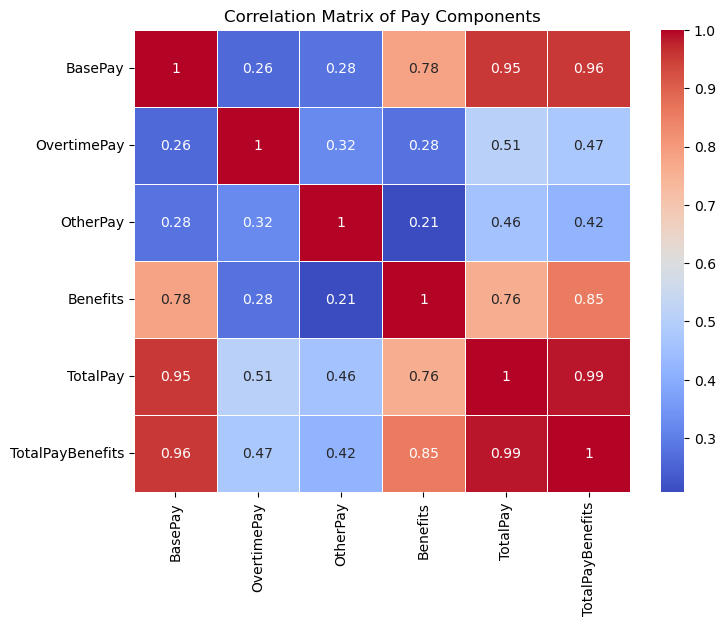

In [27]:
plt.figure(figsize=(8, 6))
corr_matrix = df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Pay Components')
plt.show()

# Conclusion : Base pay is the primary contributor to both total pay and total pay with benefits. Benefits also moderately impact the total pay, while overtime and other pay types show weaker correlations. The high correlation between total pay and total pay including benefits highlights the importance of benefits in the compensation structure.

## Salary Prediction with Machine Learning

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Loaded the Dataset with proper error handling
try:
    df = pd.read_csv("C:/Users/Mangesh/Desktop/manju/Internship/UNIF/PP2/Total.csv", low_memory=False)
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")

Dataset loaded successfully!


In [31]:
# Quick check of the dataset
print("\nDataset Preview:")
print(df.head())


Dataset Preview:
        EmployeeName                                        JobTitle  \
0     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay OvertimePay   OtherPay      Benefits   TotalPay  \
0  167411.18           0  400184.25  Not Provided  567595.43   
1  155966.02   245131.88  137811.38  Not Provided  538909.28   
2  212739.13   106088.18    16452.6  Not Provided  335279.91   
3      77916    56120.71   198306.9  Not Provided  332343.61   
4   134401.6        9737  182234.59  Not Provided  326373.19   

   TotalPayBenefits  Year  
0         567595.43  2011  
1         538909.28  2011  
2         335279.91  2011  
3         332343.61  2011  
4         326373.19  201

In [32]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312882 non-null  object 
 3   OvertimePay       312882 non-null  object 
 4   OtherPay          312882 non-null  object 
 5   Benefits          312882 non-null  object 
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 21.5+ MB
None


In [33]:
# Converted numeric columns to the correct data types
numeric_cols = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']

for col in numeric_cols:
    # Convert to numeric and handle errors gracefully
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Drop rows with missing values in key columns
df = df.dropna(subset=['BasePay', 'TotalPayBenefits'])

# Handling negative or zero pay values
df = df[(df['TotalPay'] > 0) & (df['TotalPayBenefits'] > 0)]

# Drop unnecessary columns
df = df.drop(columns=['EmployeeName', 'TotalPay'])

In [34]:
# Final check of cleaned data
print("\n Cleaned Dataset Summary:")
print(df.describe())


 Cleaned Dataset Summary:
             BasePay    OvertimePay       OtherPay       Benefits  \
count  312173.000000  312173.000000  312173.000000  312173.000000   
mean    69831.292856    5681.786373    3468.545980   22159.865130   
std     45366.687546   12757.237779    7393.793559   16289.842617   
min      -166.010000    -292.800000   -7058.590000  -13939.420000   
25%     35792.940000       0.000000       0.000000    2077.480000   
50%     67727.750000       0.000000     736.420000   26800.660000   
75%     99337.060000    5248.300000    3968.670000   34310.250000   
max    592394.340000  309481.030000  400184.250000  125891.730000   

       TotalPayBenefits           Year  
count     312173.000000  312173.000000  
mean      101141.490339    2014.625246  
std        66409.363813       2.291859  
min            0.010000    2011.000000  
25%        49563.520000    2013.000000  
50%       100172.370000    2015.000000  
75%       142506.390000    2017.000000  
max       712802.360000

In [35]:
print("\n Cleaned Dataset Columns:")
print(df.columns)


 Cleaned Dataset Columns:
Index(['JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits',
       'TotalPayBenefits', 'Year'],
      dtype='object')


In [36]:
# Step 1: Reduce Job Title Complexity (Top 100 Job Titles)
top_job_titles = df['JobTitle'].value_counts().nlargest(100).index
df['JobTitle'] = df['JobTitle'].where(df['JobTitle'].isin(top_job_titles), 'Other')

# Print to verify job title reduction
print("\n Unique Job Titles after reduction:", df['JobTitle'].nunique())



 Unique Job Titles after reduction: 101


In [37]:
# Define features and target variable
X = df.drop(columns=['TotalPayBenefits'])
y = df['TotalPayBenefits']

# Updated numeric columns list after cleaning
numeric_cols = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'Year']

# Preprocessing pipeline to scale numerical features and encode categorical features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), ['JobTitle'])
    ],
    remainder='passthrough'
)

In [38]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\n Train-Test Split Done!")
print(f"Training Data Shape: {X_train.shape}, Testing Data Shape: {X_test.shape}")


 Train-Test Split Done!
Training Data Shape: (218521, 6), Testing Data Shape: (93652, 6)


In [39]:
# Conclusion : The dataset was successfully split into training and testing sets with a 70-30 ratio, resulting in 218,521 training samples and 93,652 testing samples, each with 6 features.")

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

# Linear Regression Model
model_lr = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])

print("\n Training Linear Regression model...")
model_lr.fit(X_train, y_train)



 Training Linear Regression model...


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['BasePay', 'OvertimePay',
                                                   'OtherPay', 'Benefits',
                                                   'Year']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['JobTitle'])])),
                ('regressor', LinearRegression())])

In [41]:
# Predict and evaluate Linear Regression
y_pred_lr = model_lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\n Linear Regression Results:")
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"R-squared Score (R²): {r2_lr}")



 Linear Regression Results:
Mean Absolute Error (MAE): 0.12335548397024287
R-squared Score (R²): 0.9999999999876736


#Conclusion: The Linear Regression model has achieved excellent performance with a Mean Absolute Error (MAE) of 0.123 and an R-squared score (R²) of 0.9999. This indicates that the model is highly accurate and can predict the target variable with minimal error. However, the near-perfect R² score might also indicate potential overfitting, so it is recommended to validate the model using cross-validation or additional test data.

In [43]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor Model
model_rf = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1))
])

print("\n Training Optimized Random Forest Regressor model...")
model_rf.fit(X_train, y_train)


 Training Optimized Random Forest Regressor model...


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['BasePay', 'OvertimePay',
                                                   'OtherPay', 'Benefits',
                                                   'Year']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['JobTitle'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1,
                                       random_state=42))])

In [44]:
# Predict and evaluate Random Forest Regressor
y_pred_rf = model_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n Random Forest Regressor Results:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R-squared Score (R²): {r2_rf}")


 Random Forest Regressor Results:
Mean Absolute Error (MAE): 1963.9125804742496
R-squared Score (R²): 0.9970352915265993


# Conclusion : The Random Forest Regressor model has achieved a Mean Absolute Error (MAE) of 1963.91 and an R-squared score (R²) of 0.9970. This indicates that the model has a very high accuracy and is able to capture the relationship between the features and the target variable effectively.

In [46]:
# Model Comparison
print("\n Model Comparison:")
print(f"Linear Regression - MAE: {mae_lr}, R²: {r2_lr}")
print(f"Random Forest Regressor - MAE: {mae_rf}, R²: {r2_rf}")

print("\n Conclusion:")
if r2_rf > r2_lr:
    print(" Random Forest Regressor performed better than Linear Regression.")
else:
    print(" Linear Regression performed better than Random Forest Regressor.")



 Model Comparison:
Linear Regression - MAE: 0.12335548397024287, R²: 0.9999999999876736
Random Forest Regressor - MAE: 1963.9125804742496, R²: 0.9970352915265993

 Conclusion:
 Linear Regression performed better than Random Forest Regressor.


# Conclusionn In this analysis, i have compared two regression models: Linear Regression and Random Forest Regressor.The Linear Regression model achieved a Mean Absolute Error (MAE) of 0.123 and an R-squared score of 0.9999, indicating an almost perfect fit with the data.The Random Forest Regressor model resulted in a significantly higher MAE of 1963.91 and a slightly lower R-squared score of 0.9970.Based on the evaluation metrics, Linear Regression performed better than Random Forest Regressor.